#Library

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score, classification_report


#Data Understanding

In [ ]:
df = pd.read_csv('/content/Mental disorder symptoms.csv', delimiter=';')

In [ ]:
df['Disorder'].value_counts()

,count
Disorder,
ASD,89
anexiety,67
MDD,65
eating disorder,65
ADHD,65
PDD,60
PTSD,46
Loneliness,45
bipolar,43


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ag+1:629e                    637 non-null    int64 
 1   feeling.nervous              637 non-null    int64 
 2   panic                        637 non-null    int64 
 3   breathing.rapidly            637 non-null    int64 
 4   sweating                     637 non-null    int64 
 5   trouble.in.concentration     637 non-null    int64 
 6   having.trouble.in.sleeping   637 non-null    int64 
 7   having.trouble.with.work     637 non-null    int64 
 8   hopelessness                 637 non-null    int64 
 9   anger                        637 non-null    int64 
 10  over.react                   637 non-null    int64 
 11  change.in.eating             637 non-null    int64 
 12  suicidal.thought             637 non-null    int64 
 13  feeling.tired                637 no

In [ ]:
df

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy,Disorder
0,23,1,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,MDD
1,14,1,0,1,0,0,1,0,0,1,...,1,1,0,0,0,0,1,0,0,ASD
2,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness
3,29,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,1,bipolar
4,32,1,1,1,1,1,1,1,0,0,...,0,1,0,0,0,0,0,0,0,anexiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,23,1,0,1,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,eating disorder
633,27,1,0,1,0,0,0,0,1,1,...,1,0,1,1,1,0,0,0,0,PDD
634,19,0,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,1,ASD
635,16,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Loneliness


In [ ]:
df.describe()

,ag+1:629e,feeling.nervous,panic,breathing.rapidly,sweating,trouble.in.concentration,having.trouble.in.sleeping,having.trouble.with.work,hopelessness,anger,...,popping.up.stressful.memory,having.nightmares,avoids.people.or.activities,feeling.negative,trouble.concentrating,blamming.yourself,hallucinations,repetitive.behaviour,seasonally,increased.energy
count,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,...,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.000000,637.0,637.000000
mean,22.189953,0.638932,0.273155,0.549451,0.368917,0.365777,0.638932,0.273155,0.232339,0.324961,...,0.459969,0.329670,0.364207,0.340659,0.408163,0.244898,0.102041,0.288854,0.0,0.230769
std,8.395680,0.480688,0.445930,0.497940,0.482891,0.482026,0.480688,0.445930,0.422656,0.468728,...,0.498787,0.470463,0.481585,0.474303,0.491880,0.430365,0.302940,0.453586,0.0,0.421656
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,21.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,28.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.000000
max,46.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [ ]:
df.isna().sum()

,0
ag+1:629e,0
feeling.nervous,0
panic,0
breathing.rapidly,0
sweating,0
trouble.in.concentration,0
having.trouble.in.sleeping,0
having.trouble.with.work,0
hopelessness,0
anger,0


#Feature Selection and Label Encoding

In [ ]:
#Memilih fitur dan encode targetnya
X = df.iloc[:, :-1]
y = df['Disorder']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Class Balancing with Smote

In [ ]:
# Menggunakan SMOTE untuk oversampling
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
pd.DataFrame(y_balanced).value_counts()

,count
0,
0,89
1,89
2,89
3,89
4,89
5,89
6,89
7,89
8,89


#Modelling

In [ ]:
# Mendefinisikan berbagai model klasifikasi
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

In [ ]:
# Menyimpan hasil f1-score untuk training dan testing
train_f1_scores = []
test_f1_scores = []

In [ ]:
# Visualisasi metrik model
for name, clf in classifiers.items():
    # Melatih model
    clf.fit(X_balanced, y_balanced)

    # Prediksi pada data training dan testing
    y_train_pred = clf.predict(X_balanced)  # Gunakan X_balanced untuk prediksi training
    y_test_pred = clf.predict(X_test)  # Gunakan X_test untuk prediksi testing

    # Hitung f1-score
    train_f1_score = f1_score(y_balanced, y_train_pred, average='weighted')  # Gunakan y_balanced untuk f1-score training
    test_f1_score = f1_score(y_test, y_test_pred, average='weighted')  # Gunakan y_test untuk f1-score testing

    train_f1_scores.append(train_f1_score)
    test_f1_scores.append(test_f1_score)

    print(f"\n=== {name} ===")
    print(f"Training F1-Score: {train_f1_score * 100:.2f}%")
    print(f"Testing F1-Score: {test_f1_score * 100:.2f}%")
    print("\nClassification Report (Testing):")
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


=== Naive Bayes ===
Training F1-Score: 96.59%
Testing F1-Score: 95.64%

Classification Report (Testing):
                      precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        28
                 ASD       1.00      1.00      1.00        33
          Loneliness       1.00      1.00      1.00        24
                 MDD       1.00      0.50      0.67        26
                 OCD       1.00      1.00      1.00        25
                 PDD       0.70      1.00      0.82        30
                PTSD       1.00      1.00      1.00        25
            anexiety       1.00      1.00      1.00        20
             bipolar       1.00      1.00      1.00        31
     eating disorder       1.00      1.00      1.00        27
psychotic deprission       1.00      1.00      1.00        31
   sleeping disorder       1.00      1.00      1.00        21

            accuracy                           0.96       321
           macro avg    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



=== SVM ===
Training F1-Score: 87.72%
Testing F1-Score: 87.41%

Classification Report (Testing):
                      precision    recall  f1-score   support

                ADHD       1.00      0.86      0.92        28
                 ASD       0.92      1.00      0.96        33
          Loneliness       1.00      0.96      0.98        24
                 MDD       0.49      0.88      0.63        26
                 OCD       1.00      0.92      0.96        25
                 PDD       0.84      0.53      0.65        30
                PTSD       1.00      0.68      0.81        25
            anexiety       0.87      1.00      0.93        20
             bipolar       0.84      1.00      0.91        31
     eating disorder       1.00      0.96      0.98        27
psychotic deprission       1.00      1.00      1.00        31
   sleeping disorder       0.87      0.62      0.72        21

            accuracy                           0.87       321
           macro avg       0.90 

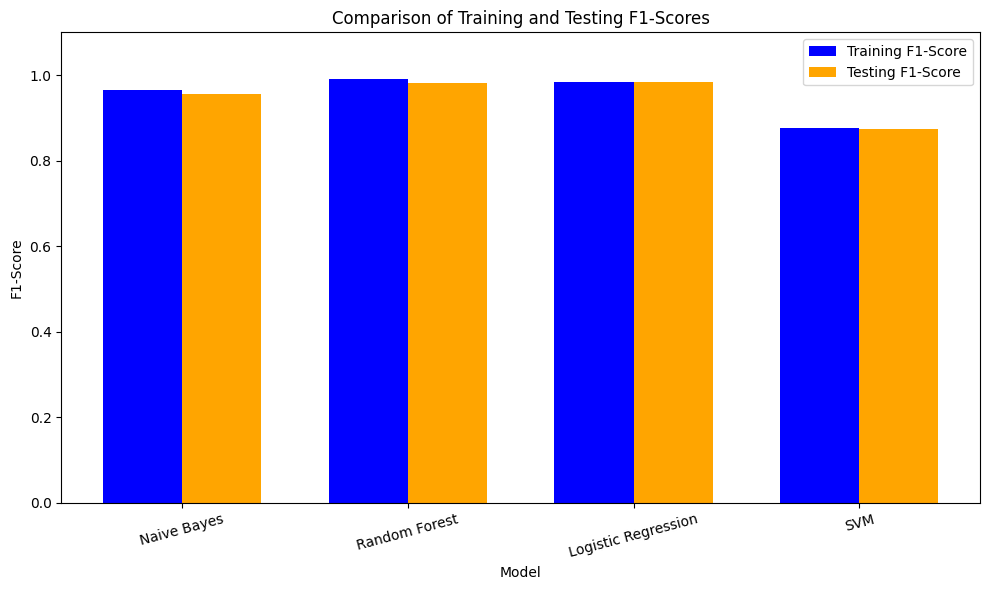

In [ ]:
# Plot perbandingan F1-score training dan testing
x_labels = list(classifiers.keys())
x = np.arange(len(x_labels))  # Posisi untuk bar

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plot f1-score training
plt.bar(x - bar_width/2, train_f1_scores, bar_width, label='Training F1-Score', color='blue')

# Plot f1-score testing
plt.bar(x + bar_width/2, test_f1_scores, bar_width, label='Testing F1-Score', color='orange')

# Customisasi plot
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.title('Comparison of Training and Testing F1-Scores')
plt.xticks(x, x_labels, rotation=15)
plt.ylim(0, 1.1)  # Batas sumbu Y
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


=== Naive Bayes ===
Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Training F1-score: 96.59%
Testing F1-score: 95.64%

Classification Report (Testing):
                      precision    recall  f1-score   support

                ADHD       1.00      1.00      1.00        28
                 ASD       1.00      1.00      1.00        33
          Loneliness       1.00      1.00      1.00        24
                 MDD       1.00      0.50      0.67        26
                 OCD       1.00      1.00      1.00        25
                 PDD       0.70      1.00      0.82        30
                PTSD       1.00      1.00      1.00        25
            anexiety       1.00      1.00      1.00        20
             bipolar       1.00      1.00      1.00        31
     eating disorder       1.00      1.00      1.00        27
psychotic deprission       1.00      1.00      1.00        31
   sleeping disorder       1.00      1.00      1.00        21

            accuracy          

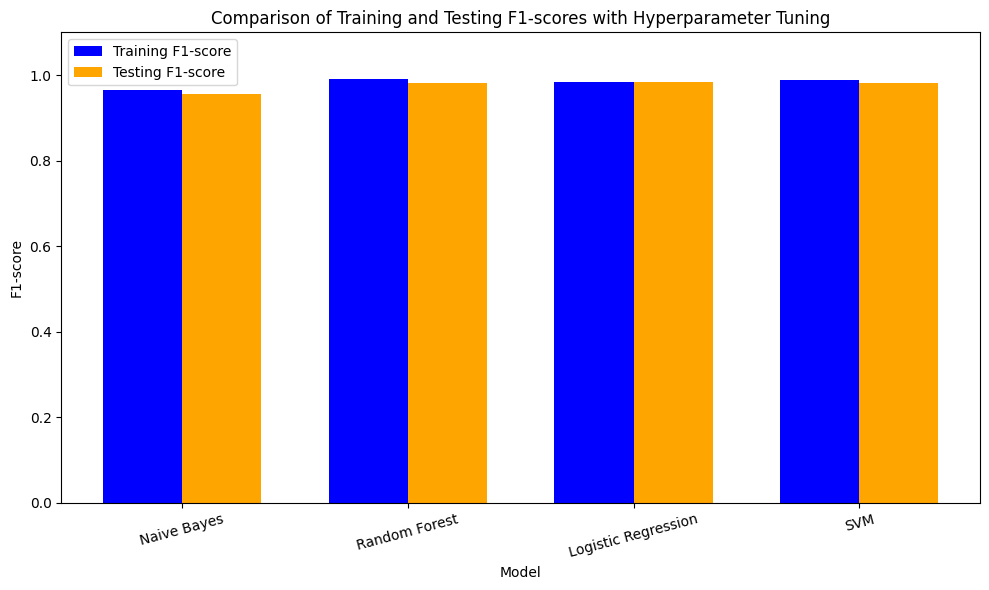

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

# Mendefinisikan berbagai model klasifikasi
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(random_state=42)
}

# Mendefinisikan hyperparameter grid untuk setiap model
param_grids = {
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0, 2.0, 5.0],  # Nilai alpha untuk smoothing
        'fit_prior': [True, False]  # Prior model
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],  # Jumlah pohon dalam random forest
        'max_depth': [None, 10, 20, 30],  # Kedalaman pohon
        'min_samples_split': [2, 5, 10],  # Minimum samples untuk split
        'min_samples_leaf': [1, 2, 4]  # Minimum samples untuk daun
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],  # Parameter regularisasi
        'solver': ['liblinear', 'saga'],  # Algoritma optimisasi
        'max_iter': [100, 200, 300]  # Jumlah iterasi maksimum
    },
    'SVM': {
        'C': [0.1, 1, 10],  # Parameter regularisasi
        'kernel': ['linear', 'rbf'],  # Kernel SVM
        'gamma': ['scale', 'auto']  # Parameter kernel rbf
    }
}

# Menyimpan hasil F1-score untuk training dan testing
train_f1_scores = []
test_f1_scores = []

# Visualisasi metrik model
for name, clf in classifiers.items():
    # Mendapatkan grid untuk hyperparameter tuning
    param_grid = param_grids[name]

    # Menggunakan GridSearchCV untuk hyperparameter tuning
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)

    # Melatih model dengan grid search
    grid_search.fit(X_balanced, y_balanced)

    # Model terbaik berdasarkan GridSearchCV
    best_model = grid_search.best_estimator_
    print(f"\n=== {name} ===")
    print(f"Best Hyperparameters: {grid_search.best_params_}")

    # Prediksi pada data training dan testing menggunakan model terbaik
    y_train_pred = best_model.predict(X_balanced)  # Gunakan X_balanced untuk prediksi training
    y_test_pred = best_model.predict(X_test)  # Gunakan X_test untuk prediksi testing

    # Hitung F1-score
    train_f1 = f1_score(y_balanced, y_train_pred, average='weighted')  # F1-score pada data training
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')  # F1-score pada data testing

    train_f1_scores.append(train_f1)
    test_f1_scores.append(test_f1)

    print(f"Training F1-score: {train_f1 * 100:.2f}%")
    print(f"Testing F1-score: {test_f1 * 100:.2f}%")
    print("\nClassification Report (Testing):")
    print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))

# Plot perbandingan F1-score training dan testing
x_labels = list(classifiers.keys())
x = np.arange(len(x_labels))  # Posisi untuk bar

plt.figure(figsize=(10, 6))
bar_width = 0.35

# Plot F1-score training
plt.bar(x - bar_width/2, train_f1_scores, bar_width, label='Training F1-score', color='blue')

# Plot F1-score testing
plt.bar(x + bar_width/2, test_f1_scores, bar_width, label='Testing F1-score', color='orange')

# Customisasi plot
plt.xlabel('Model')
plt.ylabel('F1-score')
plt.title('Comparison of Training and Testing F1-scores with Hyperparameter Tuning')
plt.xticks(x, x_labels, rotation=15)
plt.ylim(0, 1.1)  # Batas sumbu Y
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()


#Convert To Pickle

In [ ]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']